In [3]:
from cmapPy.pandasGEXpress.parse import parse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

C:\Users\deepa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [246]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# init_notebook_mode(connected=True)

In [3]:
%matplotlib inline

In [37]:
my_col_metadata = parse("PAAD.gct", col_meta_only=True)

In [38]:
my_col_metadata.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,...,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,...,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,...,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab9-Primary solid Tumor,aab9,Primary solid Tumor,4.0,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627.0,NaN,NaN,yes,...,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN


In [ ]:
my_col_metadata.to_csv("gct_data.csv",sep=",",index=None)

### Start executing from here

In [23]:
my_col_metadata = pd.read_csv('gct_data.csv')

In [24]:
null_value_dict = dict(my_col_metadata.isnull().sum())
# # for k,v in dict(my_col_metadata.isnull().sum()).items():
# #     print(k,":",v)

### Checking the null value with graph

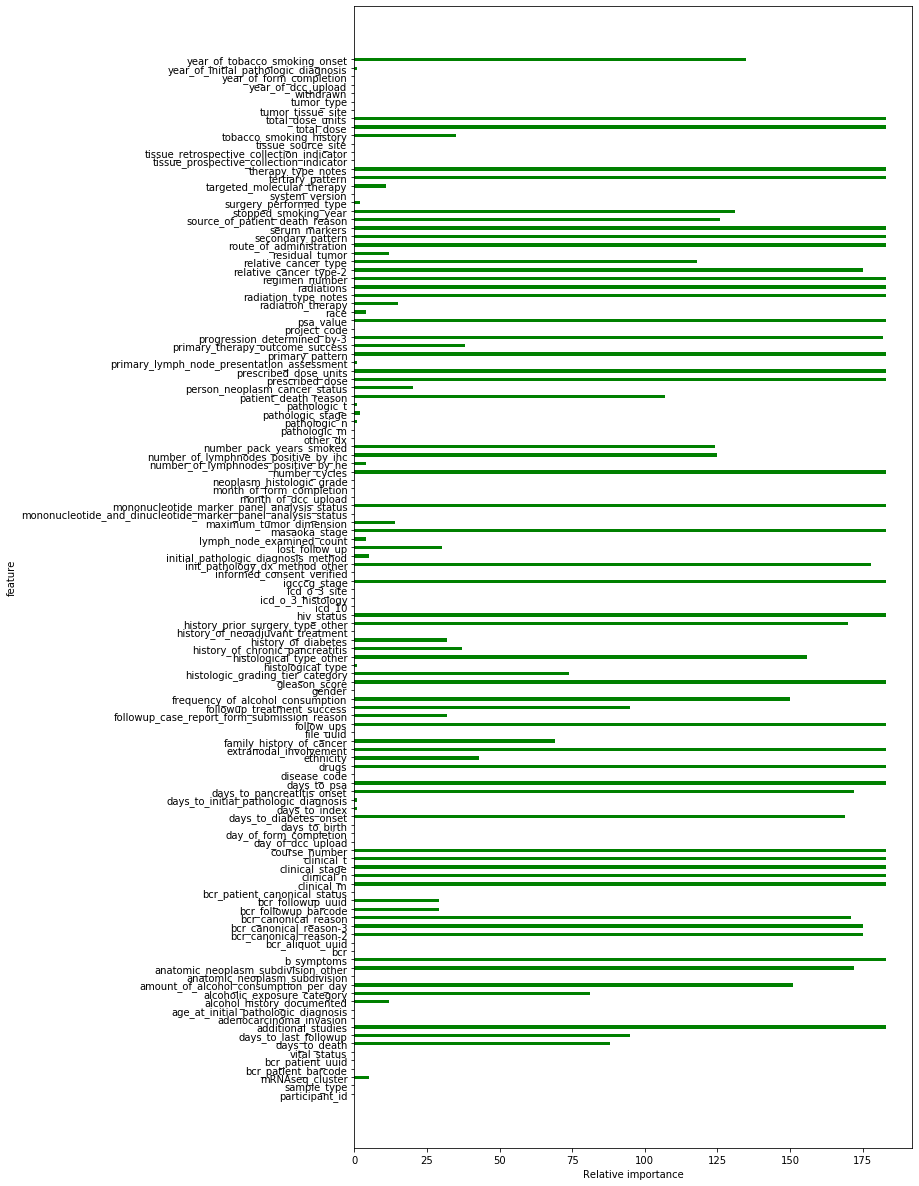

<Figure size 1440x1440 with 0 Axes>

In [25]:
col = null_value_dict.keys()
#modelname.feature_importance_
y = null_value_dict.values()
#plot
fig, ax = plt.subplots()
width = 0.4 # the width of the bars
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
# plt.title('Feature importance in '+algo)
plt.xlabel('Relative importance')
plt.ylabel('feature')
plt.figure(figsize=(20,20))
fig.set_size_inches(10, 21, forward=True)

### dropping the columns containing only null values

In [26]:
columns_list = my_col_metadata.columns
for col in columns_list:
    if null_value_dict[col] == len(my_col_metadata):
        my_col_metadata.drop(col,axis=1,inplace=True)

**Filling the null value according to the datatype**

In [27]:
for column in my_col_metadata.columns:
    if my_col_metadata[column].dtype == 'object':
        my_col_metadata[column] = my_col_metadata[column].fillna("not_available")
    if my_col_metadata[column].dtype == 'int64':
        my_col_metadata[column] = my_col_metadata[column].fillna(0)
    if my_col_metadata[column].dtype == 'float64':
        my_col_metadata[column] = my_col_metadata[column].fillna(0.0)

**Dropping all the id columns, because id columns doesn't have differentiating power**

In [ ]:
# id_columns = ['participant_id','bcr_patient_barcode','bcr_patient_uuid','bcr','bcr_aliquot_uuid','bcr_followup_barcode','bcr_followup_uuid','file_uuid']
my_col_metadata.drop(['participant_id','bcr_patient_barcode','bcr_patient_uuid','bcr','bcr_aliquot_uuid','bcr_followup_barcode','bcr_followup_uuid','file_uuid'],axis=1,inplace=True)

###  Solving the first part of assignment
**Filtering adenocarcinoma for both the categories**

In [32]:
filtered_data = pd.concat([my_col_metadata[my_col_metadata['histological_type'] == 'pancreas-adenocarcinoma-other subtype'],my_col_metadata[my_col_metadata['histological_type'] == 'pancreas-adenocarcinoma ductal type']],axis=0)
filtered_data.shape

(177, 85)

**I have comented this because, I had to solve the 3 question of first part. But for others, it is mentioned to remove Neuroendocrine, which contrasting**

In [46]:
# not_needed_values = ['neuroendocrine','neuroendocrine carcinoma nos','neuroendocrine carcinoma','moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%','82463 neuroendocrine carcinoma nos']
# for value in not_needed_values:
#     filtered_data = filtered_data[filtered_data['histological_type_other'] != value]

** Reseting the index value, so that it won't use the filtered index**

In [33]:
filtered_data = filtered_data.reset_index(drop=True)

** will use copy_df as a backup for vizualisation**

In [35]:
copy_df = filtered_data.copy()

In [36]:
filtered_data.shape

(177, 85)

** Storing the length of unique values in the form of dictionary, to drop the column with unique value = 1**

In [37]:
dictionary_unique_col = {}
for i in filtered_data.columns:
    dictionary_unique_col[i] = len(filtered_data[i].unique())

** Droping the columns with unique value = 1**

In [ ]:
for i in dictionary_unique_col.keys():
    if dictionary_unique_col[i] == 1:
        filtered_data.drop(i, axis = 1, inplace = True)


In [54]:
dictionary_unique_col = {}
for i in filtered_data.columns:
    dictionary_unique_col[i] = len(filtered_data[i].unique())

** After executing the above code and comparing with the csv file I created a list of categorical columns, which will be use in dummification**

In [40]:
categorical_columns = ['sample_type',
                      'mRNAseq_cluster',
                      'vital_status',
                      'adenocarcinoma_invasion',
                      'alcohol_history_documented',
                      'alcoholic_exposure_category',
                      'amount_of_alcohol_consumption_per_day',
                      'anatomic_neoplasm_subdivision',
                      'anatomic_neoplasm_subdivision_other',
                      'bcr_canonical_reason-2',
                      'bcr_canonical_reason-3',
                      'bcr_canonical_reason',
                      'bcr_patient_canonical_status',
                      'ethnicity',
                      'family_history_of_cancer',
                      'followup_case_report_form_submission_reason',
                      'followup_treatment_success',
                      'frequency_of_alcohol_consumption',
                      'gender',
                      'histologic_grading_tier_category',
                      'histological_type',
                      'histological_type_other',
                      'history_of_chronic_pancreatitis',
                      'history_of_diabetes',
                      'history_of_neoadjuvant_treatment',
                      'history_prior_surgery_type_other',
                      'icd_10',
                      'icd_o_3_histology',
                      'icd_o_3_site',
                      'init_pathology_dx_method_other',
                      'initial_pathologic_diagnosis_method',
                      'lost_follow_up',
                      'mononucleotide_and_dinucleotide_marker_panel_analysis_status',
                      'month_of_form_completion',
                      'neoplasm_histologic_grade',
                      'other_dx',
                      'pathologic_m',
                      'pathologic_n',
                      'pathologic_stage',
                      'pathologic_t',
                      'patient_death_reason',
                      'person_neoplasm_cancer_status',
                      'primary_lymph_node_presentation_assessment',
                      'primary_therapy_outcome_success',
                      'progression_determined_by-3',
                      'race',
                      'radiation_therapy',
                      'relative_cancer_type-2',
                      'relative_cancer_type',
                      'residual_tumor',
                      'source_of_patient_death_reason',
                      'stopped_smoking_year',
                      'surgery_performed_type',
                      'system_version',
                      'targeted_molecular_therapy',
                      'tissue_prospective_collection_indicator',
                      'tissue_retrospective_collection_indicator',
                      'tissue_source_site',
                      'tobacco_smoking_history',
                      'year_of_form_completion',
                      'year_of_initial_pathologic_diagnosis',
                      'year_of_tobacco_smoking_onset']
print(len(categorical_columns))
numerical_columns = []
for col in filtered_data.columns:
    if col not in categorical_columns:
        numerical_columns.append(col)

62


In [57]:
for column in filtered_data.columns:
    filtered_data[column] = filtered_data[column].astype("str")

** Dummified the data, because pca won't understand string**

In [41]:
dummified_data = pd.get_dummies(filtered_data[['sample_type',
                      'mRNAseq_cluster',
                      'vital_status',
                      'adenocarcinoma_invasion',
                      'alcohol_history_documented',
                      'alcoholic_exposure_category',
                      'amount_of_alcohol_consumption_per_day',
                      'anatomic_neoplasm_subdivision',
                      'anatomic_neoplasm_subdivision_other',
                      'bcr_canonical_reason-2',
                      'bcr_canonical_reason-3',
                      'bcr_canonical_reason',
                      'bcr_patient_canonical_status',
                      'ethnicity',
                      'family_history_of_cancer',
                      'followup_case_report_form_submission_reason',
                      'followup_treatment_success',
                      'frequency_of_alcohol_consumption',
                      'gender',
                      'histologic_grading_tier_category',
                      'histological_type',
                      'histological_type_other',
                      'history_of_chronic_pancreatitis',
                      'history_of_diabetes',
                      'history_of_neoadjuvant_treatment',
                      'history_prior_surgery_type_other',
                      'icd_10',
                      'icd_o_3_histology',
                      'icd_o_3_site',
                      'init_pathology_dx_method_other',
                      'initial_pathologic_diagnosis_method',
                      'lost_follow_up',
                      'mononucleotide_and_dinucleotide_marker_panel_analysis_status',
                      'month_of_form_completion',
                      'neoplasm_histologic_grade',
                      'other_dx',
                      'pathologic_m',
                      'pathologic_n',
                      'pathologic_stage',
                      'pathologic_t',
                      'patient_death_reason',
                      'person_neoplasm_cancer_status',
                      'primary_lymph_node_presentation_assessment',
                      'primary_therapy_outcome_success',
                      'progression_determined_by-3',
                      'race',
                      'radiation_therapy',
                      'relative_cancer_type-2',
                      'relative_cancer_type',
                      'residual_tumor',
                      'source_of_patient_death_reason',
                      'stopped_smoking_year',
                      'surgery_performed_type',
                      'system_version',
                      'targeted_molecular_therapy',
                      'tissue_prospective_collection_indicator',
                      'tissue_retrospective_collection_indicator',
                      'tissue_source_site',
                      'tobacco_smoking_history',
                      'year_of_form_completion',
                      'year_of_initial_pathologic_diagnosis',
                      'year_of_tobacco_smoking_onset']])

In [59]:
filtered_data.drop(['sample_type',
                      'mRNAseq_cluster',
                      'vital_status',
                      'adenocarcinoma_invasion',
                      'alcohol_history_documented',
                      'alcoholic_exposure_category',
                      'amount_of_alcohol_consumption_per_day',
                      'anatomic_neoplasm_subdivision',
                      'anatomic_neoplasm_subdivision_other',
                      'bcr_canonical_reason-2',
                      'bcr_canonical_reason-3',
                      'bcr_canonical_reason',
                      'bcr_patient_canonical_status',
                      'ethnicity',
                      'family_history_of_cancer',
                      'followup_case_report_form_submission_reason',
                      'followup_treatment_success',
                      'frequency_of_alcohol_consumption',
                      'gender',
                      'histologic_grading_tier_category',
                      'histological_type',
                      'histological_type_other',
                      'history_of_chronic_pancreatitis',
                      'history_of_diabetes',
                      'history_of_neoadjuvant_treatment',
                      'history_prior_surgery_type_other',
                      'icd_10',
                      'icd_o_3_histology',
                      'icd_o_3_site',
                      'init_pathology_dx_method_other',
                      'initial_pathologic_diagnosis_method',
                      'lost_follow_up',
                      'mononucleotide_and_dinucleotide_marker_panel_analysis_status',
                      'month_of_form_completion',
                      'neoplasm_histologic_grade',
                      'other_dx',
                      'pathologic_m',
                      'pathologic_n',
                      'pathologic_stage',
                      'pathologic_t',
                      'patient_death_reason',
                      'person_neoplasm_cancer_status',
                      'primary_lymph_node_presentation_assessment',
                      'primary_therapy_outcome_success',
                      'progression_determined_by-3',
                      'race',
                      'radiation_therapy',
                      'relative_cancer_type-2',
                      'relative_cancer_type',
                      'residual_tumor',
                      'source_of_patient_death_reason',
                      'stopped_smoking_year',
                      'surgery_performed_type',
                      'system_version',
                      'targeted_molecular_therapy',
                      'tissue_prospective_collection_indicator',
                      'tissue_retrospective_collection_indicator',
                      'tissue_source_site',
                      'tobacco_smoking_history',
                      'year_of_form_completion',
                      'year_of_initial_pathologic_diagnosis',
                      'year_of_tobacco_smoking_onset'],axis=1,inplace=True)

In [61]:
filtered_data = pd.concat([filtered_data,dummified_data],axis=1)

In [62]:
filtered_data

,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_pancreatitis_onset,lymph_node_examined_count,maximum_tumor_dimension,number_of_lymphnodes_positive_by_he,...,year_of_tobacco_smoking_onset_1980.0,year_of_tobacco_smoking_onset_1981.0,year_of_tobacco_smoking_onset_1982.0,year_of_tobacco_smoking_onset_1983.0,year_of_tobacco_smoking_onset_1984.0,year_of_tobacco_smoking_onset_1987.0,year_of_tobacco_smoking_onset_1988.0,year_of_tobacco_smoking_onset_1989.0,year_of_tobacco_smoking_onset_1991.0,year_of_tobacco_smoking_onset_1993.0
0,66.0,0.0,65,5,-23962,0.0,0.0,22.0,4.5,7.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,729.0,48,16,-17794,0.0,-292.0,34.0,6.8,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1287.0,61,15,-22425,0.0,0.0,8.0,2.2,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,969.0,55,16,-20316,0.0,-46.0,19.0,3.5,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1383.0,52,29,-19315,0.0,0.0,57.0,14.0,16.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.0,951.0,67,9,-24810,0.0,0.0,15.0,2.4,0.0,...,0,0,0,0,0,0,0,0,0,0
173,0.0,350.0,59,11,-21792,0.0,0.0,17.0,3.2,4.0,...,0,0,0,0,0,0,0,0,0,0
174,0.0,350.0,59,11,-21792,0.0,0.0,17.0,3.2,4.0,...,0,0,0,0,0,0,0,0,0,0
175,0.0,2016.0,61,29,-22376,0.0,0.0,17.0,4.2,2.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# filtered_data.to_csv("filtered_data_dummified.csv",sep=",",index=None)

** Doing standard scaling to standarize the data in between -1 to 1**

In [ ]:
scaler = StandardScaler()
scaled_filtered_data = pd.DataFrame(scaler.fit_transform(filtered_data),columns=filtered_data.columns,index=filtered_data.index)

In [64]:
scaled_filtered_data

,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_pancreatitis_onset,lymph_node_examined_count,maximum_tumor_dimension,number_of_lymphnodes_positive_by_he,...,year_of_tobacco_smoking_onset_1980.0,year_of_tobacco_smoking_onset_1981.0,year_of_tobacco_smoking_onset_1982.0,year_of_tobacco_smoking_onset_1983.0,year_of_tobacco_smoking_onset_1984.0,year_of_tobacco_smoking_onset_1987.0,year_of_tobacco_smoking_onset_1988.0,year_of_tobacco_smoking_onset_1989.0,year_of_tobacco_smoking_onset_1991.0,year_of_tobacco_smoking_onset_1993.0
0,-0.497717,-0.639839,0.038636,-1.299173,-0.044644,0.081948,0.080207,0.543108,0.435925,1.268318,...,-0.131306,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378
1,-0.687628,0.787454,-1.511449,-0.218194,1.497638,0.081948,-0.135858,1.849520,1.604228,-0.872617,...,-0.131306,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378
2,-0.687628,1.879950,-0.326090,-0.316465,0.339676,0.081948,0.080207,-0.981039,-0.732377,-0.872617,...,-0.131306,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378
3,-0.687628,1.257345,-0.873179,-0.218194,0.867023,0.081948,0.046170,0.216505,-0.072032,-0.872617,...,-0.131306,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378
4,-0.687628,2.067907,-1.146723,1.059325,1.117319,0.081948,0.080207,4.353476,5.261523,4.020948,...,-0.131306,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,-0.687628,1.222103,0.220999,-0.906090,-0.256682,0.081948,0.080207,-0.218965,-0.630786,-0.872617,...,-0.131306,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378
173,-0.687628,0.045418,-0.508453,-0.709548,0.497955,0.081948,0.080207,-0.001230,-0.224420,0.350775,...,-0.131306,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378
174,-0.687628,0.045418,-0.508453,-0.709548,0.497955,0.081948,0.080207,-0.001230,-0.224420,0.350775,...,-0.131306,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378
175,-0.687628,3.307244,-0.326090,1.059325,0.351929,0.081948,0.080207,-0.001230,0.283538,-0.260921,...,-0.131306,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378,-0.075378,-0.106904,-0.075378,-0.075378


In [65]:
# scaled_filtered_data.to_csv("filtered_data_scaled.csv",sep=",",index=None)

In [66]:
pca = PCA(n_components=177)
X_pca = pca.fit_transform(scaled_filtered_data)
X_pca_reconst = pca.inverse_transform(X_pca)

In [67]:
pca_df = pd.DataFrame(X_pca)

** To vizualise the output of pca, I am using TSNE**

In [ ]:
y = TSNE(n_components=2).fit_transform(pca_df)

In [69]:
t_sne = pd.DataFrame(y)

** I am using it as a 3rd and 4th column, copying it from above copy_df**

In [71]:
t_sne['histological_type'] = copy_df.histological_type
t_sne['histological_type_other'] = copy_df.histological_type_other

** Droping not available rows( I have given na values as not available) to vizualise **

In [72]:
t_sne_filtered = t_sne[t_sne['histological_type_other']!='not_available']

In [73]:
t_sne_filtered = t_sne_filtered.reset_index(drop=True)

** For clear understanding of pca, I am renaming **

In [44]:
adenocarcinoma = ['invasive adenocarcinoma','poorly differentiated adenocarcinoma','adenocarcinoma, nos','poorly differentiated pancreatic adenocarcinoma','adenocarcinoma- nos']
neuroendocrine = ['neuroendocrine','neuroendocrine carcinoma nos','82463 neuroendocrine carcinoma nos', 'neuroendocrine carcinoma']

In [78]:
for i in range(len(t_sne_filtered)):
    if t_sne_filtered['histological_type_other'][i] in adenocarcinoma:
        t_sne_filtered['histological_type_other'][i] = 'adenocarcinoma'
    if t_sne_filtered['histological_type_other'][i] in neuroendocrine:
        t_sne_filtered['histological_type_other'][i] = 'neuroendocrine'

/home/myhealthcareai/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/myhealthcareai/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


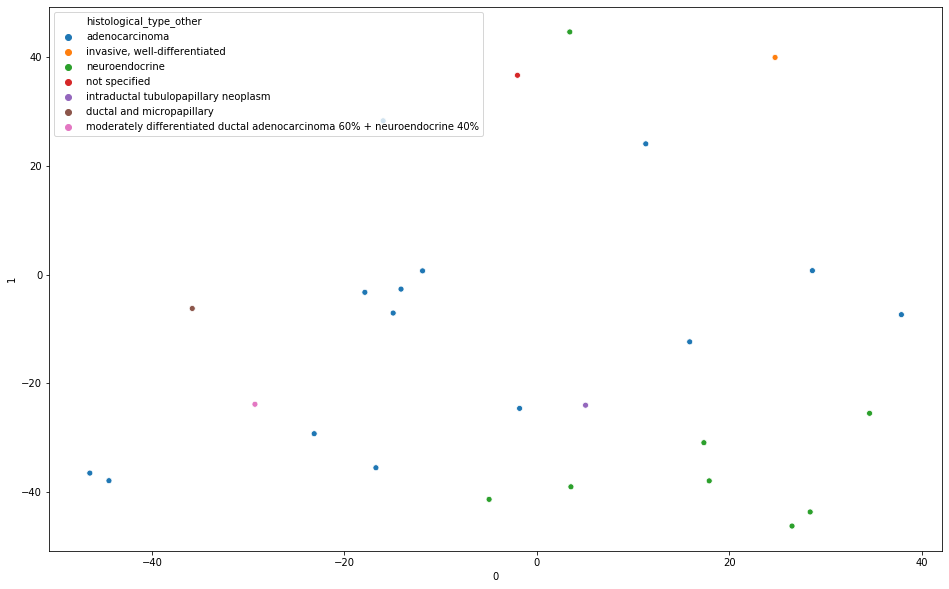

In [79]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y=1,
    hue='histological_type_other',
#     palette=sns.color_palette("hls", 12),
    data=t_sne_filtered,
    legend="full",
#     alpha=0.3
)

** So here we came to a conclusion that bottem right of the graph is neuroendocrine, and rest are adenocarcinoma, and data is too sparse to have a pca vizualisation. And as the data points are less the variance are more**